In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import scipy.stats as stats

# 1. import weather data set
data reference : daily weather data set in Chicago from 2001.01.01. ~ 2018.12.31. https://www.visualcrossing.com/weather/weather-data-services

In [50]:
weather = pd.read_csv('chicago_weather_2001_2018.csv',low_memory=False)
weather = weather[['datetime', 'temp', 'feelslike', 'humidity', 'precip',  'windspeed', 'cloudcover', 'visibility', 'solarenergy']]
weather.set_index('datetime',drop=True,inplace=True) # set index as datetime
weather.index = pd.to_datetime(weather.index)

weather

,temp,feelslike,humidity,precip,windspeed,cloudcover,visibility,solarenergy
datetime,,,,,,,,
2001-01-01,-7.6,-12.7,76.0,0.000,20.9,50.2,15.5,NaN
2001-01-02,-11.2,-17.6,81.3,0.000,21.5,2.2,15.0,NaN
2001-01-03,-6.2,-13.0,86.5,0.000,26.9,93.5,7.4,NaN
2001-01-04,-3.3,-8.8,86.4,0.000,34.4,98.6,11.4,NaN
2001-01-05,0.5,-4.8,71.2,6.069,33.5,43.0,15.5,NaN
...,...,...,...,...,...,...,...,...
2018-12-27,7.5,4.3,82.0,14.123,34.9,99.6,13.6,0.7
2018-12-28,3.1,-1.6,83.0,0.575,38.0,98.9,13.6,1.9
2018-12-29,-1.9,-5.8,86.3,0.628,25.7,100.0,11.8,0.8


In [51]:
weather.columns

Index(['temp', 'feelslike', 'humidity', 'precip', 'windspeed', 'cloudcover',
       'visibility', 'solarenergy'],
      dtype='object')

# 2. import crime data set
crime data set in Chicago from 2001.01.01. to present https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2/data

In [52]:
crime = pd.read_csv('Crimes_-_2001_to_Present.csv',low_memory=False, index_col=False)
crime

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,...,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,...,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,...,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7677062,12847575,JF420478,09/01/2022 05:00:00 AM,005XX W SURF ST,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True,...,44.0,6.0,26,1172497.0,1919410.0,2022,11/12/2022 03:46:21 PM,41.934305,-87.641485,"(41.934304581, -87.641484982)"
7677063,12847801,JF420319,07/08/2022 12:00:00 AM,114XX S PRAIRIE AVE,1130,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,STREET,False,False,...,9.0,49.0,11,1179966.0,1828818.0,2022,11/12/2022 03:46:21 PM,41.685544,-87.616813,"(41.685543881, -87.616812541)"
7677064,12847324,JF420102,09/27/2022 11:00:00 AM,023XX E 70TH ST,0810,THEFT,OVER $500,RESIDENCE,False,False,...,5.0,43.0,06,1193181.0,1859005.0,2022,11/12/2022 03:46:21 PM,41.768068,-87.567453,"(41.768068052, -87.567452932)"
7677065,12847570,JF420427,09/03/2022 10:25:00 AM,052XX W CARMEN AVE,2021,NARCOTICS,POSSESS - BARBITURATES,RESIDENCE - YARD (FRONT / BACK),True,False,...,45.0,11.0,18,1140553.0,1933418.0,2022,11/12/2022 03:46:21 PM,41.973391,-87.758535,"(41.973391184, -87.758534512)"


In [53]:
crime['Datetime'] = pd.to_datetime(crime['Date'],format="%m/%d/%Y %I:%M:%S %p")
crime['Date'] = crime['Datetime'].apply(lambda x:x.date())
crime['Weekday'] = crime['Datetime'].apply(lambda x:x.weekday())
crime['Hour'] = crime['Datetime'].apply(lambda x:x.hour)
crime['Day'] = crime['Datetime'].apply(lambda x:x.day)
crime['Week'] = crime['Datetime'].apply(lambda x:x.week)
crime['Month'] = crime['Datetime'].apply(lambda x:x.month)

crime.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Updated On,Latitude,Longitude,Location,Datetime,Weekday,Hour,Day,Week,Month
0,10224738,HY411648,2015-09-05,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)",2015-09-05 13:30:00,5,13,5,36,9
1,10224739,HY411615,2015-09-04,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,...,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)",2015-09-04 11:30:00,4,11,4,36,9
2,11646166,JC213529,2018-09-01,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,04/06/2019 04:04:43 PM,NaN,NaN,NaN,2018-09-01 00:01:00,5,0,1,35,9
3,10224740,HY411595,2015-09-05,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,...,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)",2015-09-05 12:45:00,5,12,5,36,9
4,10224741,HY411610,2015-09-05,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,...,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)",2015-09-05 13:00:00,5,13,5,36,9


# 3. crime data visualization

In [54]:
crime['weekday'] = crime['Datetime'].dt.day_name()
crime.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Latitude,Longitude,Location,Datetime,Weekday,Hour,Day,Week,Month,weekday
0,10224738,HY411648,2015-09-05,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,41.815117,-87.670000,"(41.815117282, -87.669999562)",2015-09-05 13:30:00,5,13,5,36,9,Saturday
1,10224739,HY411615,2015-09-04,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,...,41.895080,-87.765400,"(41.895080471, -87.765400451)",2015-09-04 11:30:00,4,11,4,36,9,Friday
2,11646166,JC213529,2018-09-01,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,NaN,NaN,NaN,2018-09-01 00:01:00,5,0,1,35,9,Saturday
3,10224740,HY411595,2015-09-05,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,...,41.937406,-87.716650,"(41.937405765, -87.716649687)",2015-09-05 12:45:00,5,12,5,36,9,Saturday
4,10224741,HY411610,2015-09-05,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,...,41.881903,-87.755121,"(41.881903443, -87.755121152)",2015-09-05 13:00:00,5,13,5,36,9,Saturday


Text(-15.449999999999989, 0.5, 'Count')

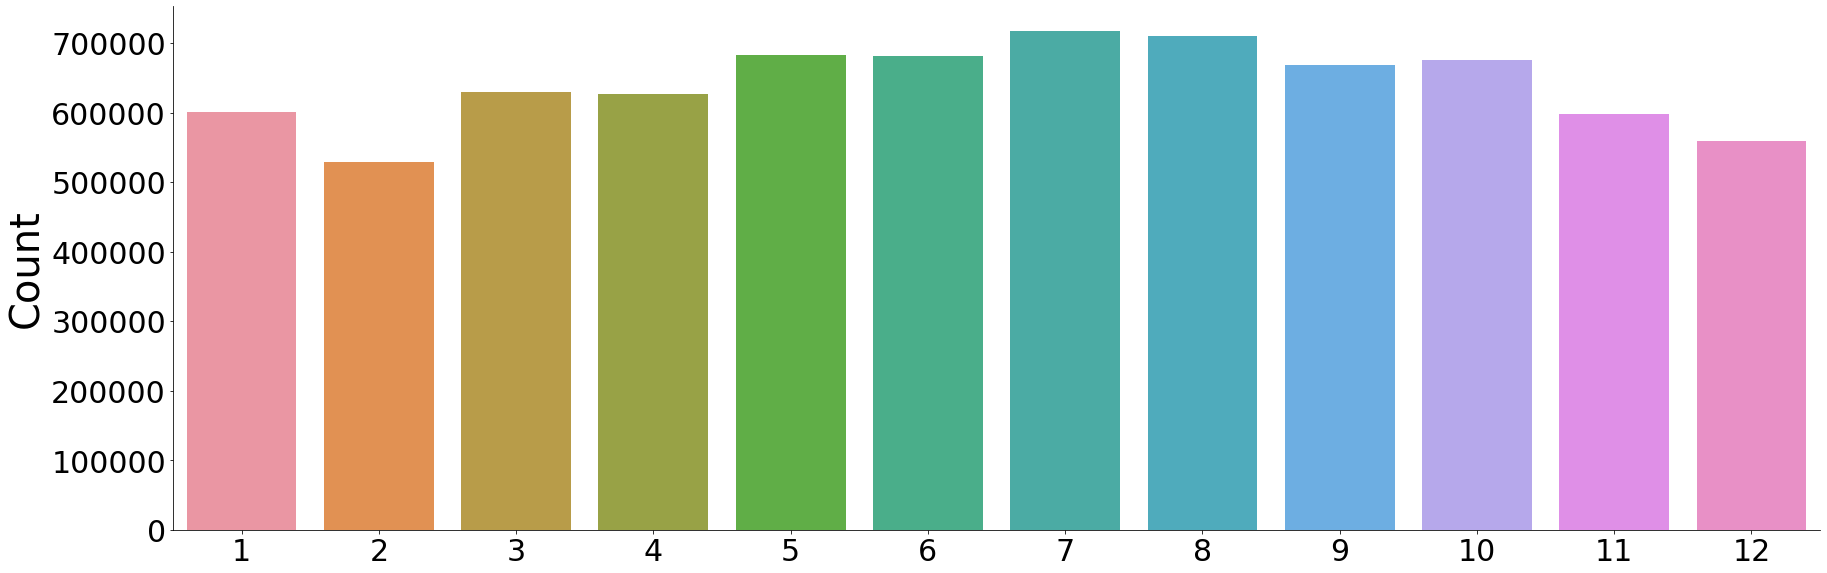

In [88]:
#평균적으로 여름에 가장 범죄율이 높다
# Crimes by month of year
crime['month']=crime['Datetime'].dt.month
sns.catplot(x='month',
           kind='count',
            height=8, 
            aspect=3,
           data=crime)
plt.xticks(size=30)
plt.yticks(size=30)
plt.xlabel('Month')
plt.ylabel('Count', fontsize=40)

Text(-15.449999999999996, 0.5, 'Count')

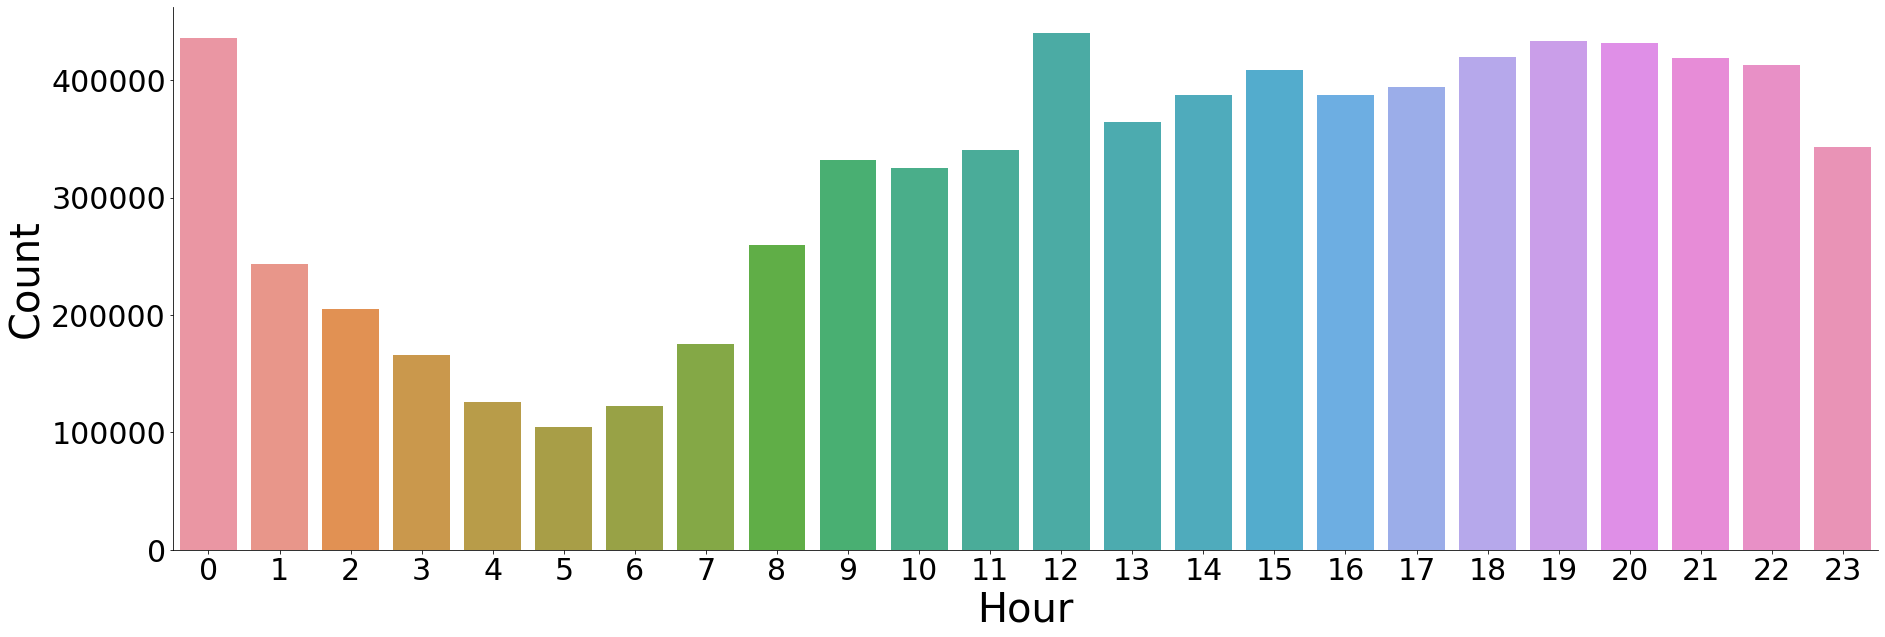

In [89]:
# Crimes by hour
crime['hour']=crime['Datetime'].dt.hour
sns.catplot(x='hour',
           kind='count',
            height=8.27, 
            aspect=3,
           data=crime)
plt.xticks(size=30)
plt.yticks(size=30)
plt.xlabel('Hour', fontsize=40)
plt.ylabel('Count', fontsize=40)
#결과를 보면 범죄는 새벽에 가장 낮은 빈도를, 오후에 가장 높은 빈도를 
#보인다.

# 4. merge crime data and weather data

In [ ]:
#혹시 범죄의 종류가 아니라 위치 장소에 따른 영향은 어떨까?
#특정 날씨에 어디에서 범죄가 자주 발생하는지  > 그럼 이게 의미가 있다면
#어떤 장소에 어떤 범죄가 가장 의미가 있는지 의사결정나무로 확인할 수 있음(예를 들어 비오는 날에는 레스토랑에서 폭행이 많다 등)

In [109]:
crime['Location Description'].value_counts() #많은 장소 4개만 뽑아

STREET                    1995455
RESIDENCE                 1291987
APARTMENT                  858711
SIDEWALK                   724491
OTHER                      270044
                           ...   
TRUCKING TERMINAL               1
LIVERY AUTO                     1
POLICE FACILITY                 1
JUNK YARD/GARBAGE DUMP          1
EXPRESSWAY EMBANKMENT           1
Name: Location Description, Length: 215, dtype: int64

In [121]:
STREET = crime[crime['Location Description'] == 'STREET'].groupby('Date')['Location Description'].agg(len)
STREET.index = pd.to_datetime(STREET.index)
RESIDENCE = crime[crime['Location Description'] == 'RESIDENCE'].groupby('Date')['Location Description'].agg(len)
RESIDENCE.index = pd.to_datetime(RESIDENCE.index)
APARTMENT = crime[crime['Location Description'] == 'APARTMENT'].groupby('Date')['Location Description'].agg(len)
APARTMENT.index = pd.to_datetime(APARTMENT.index)
SIDEWALK = crime[crime['Location Description'] == 'SIDEWALK'].groupby('Date')['Location Description'].agg(len)
SIDEWALK.index = pd.to_datetime(SIDEWALK.index)

In [122]:
#merge함수를 이용하여 공통 컬럼을 기준으로 데이터를 합친다
#기준이 되는 컬럼(Datetime)이 key이다
df_1 = pd.merge(weather, STREET, left_index=True, right_index=True, how='left')
df_1 = df_1.rename(columns={'Location Description':'STREET'})

df_1 = pd.merge(df_1, RESIDENCE, left_index=True, right_index=True, how='left')
df_1 = df_1.rename(columns={'Location Description':'RESIDENCE'})

df_1 = pd.merge(df_1, APARTMENT, left_index=True, right_index=True, how='left')
df_1 = df_1.rename(columns={'Location Description':'APARTMENT'})

df_1 = pd.merge(df_1, SIDEWALK, left_index=True, right_index=True, how='left')
df_1 = df_1.rename(columns={'Location Description':'SIDEWALK'})

df_1


,temp,feelslike,humidity,precip,windspeed,cloudcover,visibility,solarenergy,STREET,RESIDENCE,APARTMENT,SIDEWALK
datetime,,,,,,,,,,,,
2001-01-01,-7.6,-12.7,76.0,0.000,20.9,50.2,15.5,NaN,372,728,181,57
2001-01-02,-11.2,-17.6,81.3,0.000,21.5,2.2,15.0,NaN,347,274,67,40
2001-01-03,-6.2,-13.0,86.5,0.000,26.9,93.5,7.4,NaN,362,268,73,42
2001-01-04,-3.3,-8.8,86.4,0.000,34.4,98.6,11.4,NaN,386,252,57,40
2001-01-05,0.5,-4.8,71.2,6.069,33.5,43.0,15.5,NaN,424,243,58,64
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-27,7.5,4.3,82.0,14.123,34.9,99.6,13.6,0.7,137,109,89,48
2018-12-28,3.1,-1.6,83.0,0.575,38.0,98.9,13.6,1.9,159,115,123,50
2018-12-29,-1.9,-5.8,86.3,0.628,25.7,100.0,11.8,0.8,171,115,106,43


In [123]:
df_1= df_1.fillna(0)

In [124]:
df_1.dtypes

temp           float64
feelslike      float64
humidity       float64
precip         float64
windspeed      float64
cloudcover     float64
visibility     float64
solarenergy    float64
STREET           int64
RESIDENCE        int64
APARTMENT        int64
SIDEWALK         int64
dtype: object

<AxesSubplot:>

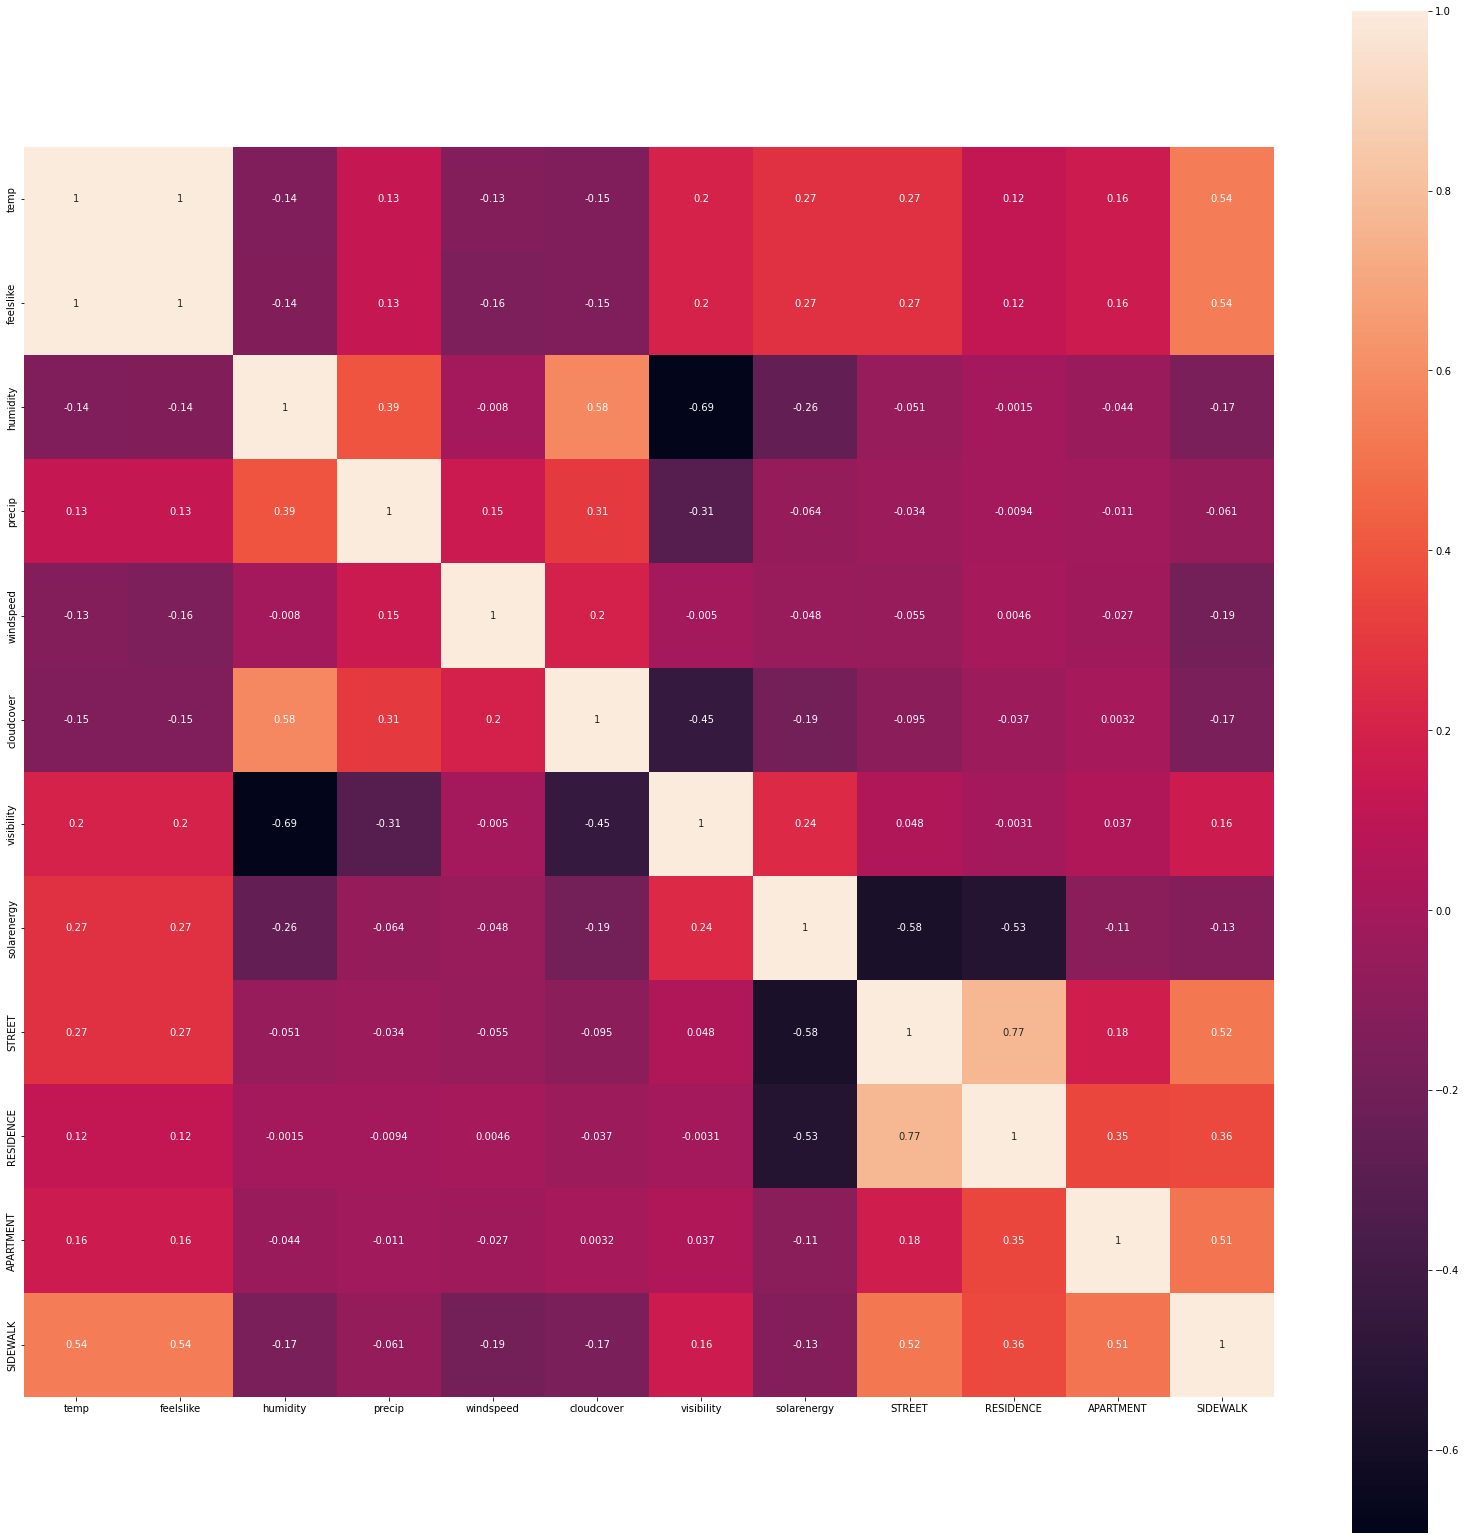

In [125]:
cor = df_1.corr()
plt.figure(figsize=(28,28))
sns.heatmap(cor, vmax=1,square=True,annot=True)

In [126]:
from sklearn.model_selection import train_test_split
#학습에 사용할 feature 선정 후 train/test분리(default 75:25)
X=df_1[['temp','feelslike','humidity','visibility']] #temp, humidity, precip, windspeed, cloudcover, visibility, solarenergy
y=df_1[['STREET']]
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [127]:
#LinearRegression 진행
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression().fit(X_train, y_train)
y_pred = lr.predict(X_test)
# r-square 함수사용
r2_score(y_test, y_pred)

0.07815499258886816

In [128]:
import statsmodels.api as sm
X_data = sm.add_constant(X, has_constant='add')
lr_check = sm.OLS(y,X_data)
result = lr_check.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 STREET   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     130.2
Date:                Tue, 29 Nov 2022   Prob (F-statistic):          3.85e-107
Time:                        02:05:20   Log-Likelihood:                -39303.
No. Observations:                6574   AIC:                         7.862e+04
Df Residuals:                    6569   BIC:                         7.865e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        298.3365     18.024     16.552      0.000     263.004     333.669
temp          -2.2406      1.437     -1.559      0.119      -5.058       0.577
feelslike      3.8691      1.188      3.257      0.001       1.541       6.198
humidity      -0.3031      0.136     -2.235      0.025      -0.569      -0.037
visibility    -1.2758      0.672     -1.899      0.058      -2.593       0.041
==============================================================================
Omnibus:                      486.942   Durbin-Watson:                   0.140
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.135
Skew:                           0.380   Prob(JB):                     6.04e-64
Kurtosis:                       2.304   Cond. No.                     1.08e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [130]:
from sklearn.model_selection import train_test_split
#학습에 사용할 feature 선정 후 train/test분리(default 75:25)
X=df_1[['STREET','RESIDENCE','APARTMENT','SIDEWALK']] 
y=df_1[['temp']]
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [131]:
#LinearRegression 진행
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression().fit(X_train, y_train)
y_pred = lr.predict(X_test)
# r-square 함수사용
r2_score(y_test, y_pred)

0.3053201221052164

In [132]:
import statsmodels.api as sm
X_data = sm.add_constant(X, has_constant='add')
lr_check = sm.OLS(y,X_data)
result = lr_check.fit()
result.summary()
#그나마 기온이 가장 높은 연관과 예측을 가짐

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   temp   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.309
Method:                 Least Squares   F-statistic:                     736.5
Date:                Tue, 29 Nov 2022   Prob (F-statistic):               0.00
Time:                        02:09:38   Log-Likelihood:                -23858.
No. Observations:                6574   AIC:                         4.773e+04
Df Residuals:                    6569   BIC:                         4.776e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8419      0.644      1.308      0.191      -0.420       2.103
STREET         0.0044      0.002      2.076      0.038       0.000       0.009
RESIDENCE     -0.0172      0.004     -4.904      0.000      -0.024      -0.010
APARTMENT     -0.0685      0.007     -9.564      0.000      -0.083      -0.054
SIDEWALK       0.1898      0.004     42.454      0.000       0.181       0.199
==============================================================================
Omnibus:                      109.260   Durbin-Watson:                   0.279
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.143
Skew:                           0.058   Prob(JB):                     1.18e-14
Kurtosis:                       2.530   Cond. No.                     2.12e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [58]:
crime['Primary Type'].value_counts()

THEFT                                1619586
BATTERY                              1406160
CRIMINAL DAMAGE                       875325
NARCOTICS                             744549
ASSAULT                               498654
OTHER OFFENSE                         477125
BURGLARY                              421175
MOTOR VEHICLE THEFT                   362235
DECEPTIVE PRACTICE                    336587
ROBBERY                               288349
CRIMINAL TRESPASS                     212364
WEAPONS VIOLATION                     102966
PROSTITUTION                           69735
OFFENSE INVOLVING CHILDREN             54742
PUBLIC PEACE VIOLATION                 52002
SEX OFFENSE                            30109
CRIM SEXUAL ASSAULT                    27699
INTERFERENCE WITH PUBLIC OFFICER       18168
LIQUOR LAW VIOLATION                   14826
GAMBLING                               14616
ARSON                                  13072
HOMICIDE                               12298
KIDNAPPING

In [59]:
THEFT = crime[crime['Primary Type'] == 'THEFT'].groupby('Date')['Primary Type'].agg(len)
BATTERY = crime[crime['Primary Type'] == 'BATTERY'].groupby('Date')['Primary Type'].agg(len)
CRIMINAL_DAMAGE   = crime[crime['Primary Type'] == 'CRIMINAL DAMAGE'].groupby('Date')['Primary Type'].agg(len)
ASSAULT = crime[crime['Primary Type'] == 'ASSAULT'].groupby('Date')['Primary Type'].agg(len)
BURGLARY = crime[crime['Primary Type'] == 'BURGLARY'].groupby('Date')['Primary Type'].agg(len)
NARCOTICS = crime[crime['Primary Type'] == 'NARCOTICS'].groupby('Date')['Primary Type'].agg(len)
ROBBERY = crime[crime['Primary Type'] == 'ROBBERY'].groupby('Date')['Primary Type'].agg(len)
MOTOR_VEHICLE_THEFT = crime[crime['Primary Type'] == 'MOTOR VEHICLE THEFT'].groupby('Date')['Primary Type'].agg(len)
CRIMINAL_TRESPASS = crime[crime['Primary Type'] == 'CRIMINAL TRESPASS'].groupby('Date')['Primary Type'].agg(len)
WEAPONS_VIOLATION = crime[crime['Primary Type'] == 'WEAPONS VIOLATION'].groupby('Date')['Primary Type'].agg(len)
OFFENSE_INVOLVING_CHILDREN = crime[crime['Primary Type'] == 'OFFENSE INVOLVING CHILDREN'].groupby('Date')['Primary Type'].agg(len)
CRIM_SEXUAL_ASSAULT = crime[crime['Primary Type'] == 'CRIM SEXUAL ASSAULT'].groupby('Date')['Primary Type'].agg(len)
INTERFERENCE_WITH_PUBLIC_OFFICER = crime[crime['Primary Type'] == 'INTERFERENCE WITH PUBLIC OFFICER'].groupby('Date')['Primary Type'].agg(len)
SEX_OFFENSE = crime[crime['Primary Type'] == 'SEX OFFENSE'].groupby('Date')['Primary Type'].agg(len)
PROSTITUTION = crime[crime['Primary Type'] == 'PROSTITUTION'].groupby('Date')['Primary Type'].agg(len)
ARSON = crime[crime['Primary Type'] == 'ARSON'].groupby('Date')['Primary Type'].agg(len)
LIQUOR_LAW_VIOLATION = crime[crime['Primary Type'] == 'LIQUOR LAW VIOLATION'].groupby('Date')['Primary Type'].agg(len)
KIDNAPPING = crime[crime['Primary Type'] == 'KIDNAPPING'].groupby('Date')['Primary Type'].agg(len)


THEFT.index = pd.to_datetime(THEFT.index)
BATTERY.index = pd.to_datetime(BATTERY.index)
CRIMINAL_DAMAGE.index = pd.to_datetime(CRIMINAL_DAMAGE.index)
ASSAULT.index = pd.to_datetime(ASSAULT.index)
BURGLARY.index = pd.to_datetime(BURGLARY.index)
NARCOTICS.index = pd.to_datetime(NARCOTICS.index)
ROBBERY.index = pd.to_datetime(ROBBERY.index)
MOTOR_VEHICLE_THEFT.index = pd.to_datetime(MOTOR_VEHICLE_THEFT.index)
CRIMINAL_TRESPASS.index = pd.to_datetime(CRIMINAL_TRESPASS.index)
WEAPONS_VIOLATION.index = pd.to_datetime(WEAPONS_VIOLATION.index)
OFFENSE_INVOLVING_CHILDREN.index = pd.to_datetime(OFFENSE_INVOLVING_CHILDREN.index)
CRIM_SEXUAL_ASSAULT.index = pd.to_datetime(CRIM_SEXUAL_ASSAULT.index)
INTERFERENCE_WITH_PUBLIC_OFFICER.index = pd.to_datetime(INTERFERENCE_WITH_PUBLIC_OFFICER.index)
SEX_OFFENSE.index = pd.to_datetime(SEX_OFFENSE.index)
PROSTITUTION.index = pd.to_datetime(PROSTITUTION.index)
ARSON.index = pd.to_datetime(ARSON.index)
LIQUOR_LAW_VIOLATION.index = pd.to_datetime(LIQUOR_LAW_VIOLATION.index)
KIDNAPPING.index = pd.to_datetime(KIDNAPPING.index)

In [60]:
#merge함수를 이용하여 공통 컬럼을 기준으로 데이터를 합친다
#기준이 되는 컬럼(Datetime)이 key이다
df = pd.merge(weather, THEFT, left_index=True, right_index=True, how='left')
df = df.rename(columns={'Primary Type':'THEFT'})

df = pd.merge(df, BATTERY, left_index=True, right_index=True, how='left')
df = df.rename(columns={'Primary Type':'BATTERY'})

df = pd.merge(df, CRIMINAL_DAMAGE, left_index=True, right_index=True, how='left')
df = df.rename(columns={'Primary Type':'CRIMINAL_DAMAGE'})

df = pd.merge(df, ASSAULT, left_index=True, right_index=True, how='left')
df = df.rename(columns={'Primary Type':'ASSAULT'})

df = pd.merge(df, BURGLARY, left_index=True, right_index=True, how='left')
df = df.rename(columns={'Primary Type':'BURGLARY'})

df = pd.merge(df, NARCOTICS, left_index=True, right_index=True, how='left')
df = df.rename(columns={'Primary Type':'NARCOTICS'})

df = pd.merge(df, ROBBERY, left_index=True, right_index=True, how='left')
df = df.rename(columns={'Primary Type':'ROBBERY'})

df = pd.merge(df, MOTOR_VEHICLE_THEFT, left_index=True, right_index=True, how='left')
df = df.rename(columns={'Primary Type':'MOTOR_VEHICLE_THEFT'})

df = pd.merge(df, CRIMINAL_TRESPASS, left_index=True, right_index=True, how='left')
df = df.rename(columns={'Primary Type':'CRIMINAL_TRESPASS'})

df = pd.merge(df, WEAPONS_VIOLATION, left_index=True, right_index=True, how='left')
df = df.rename(columns={'Primary Type':'WEAPONS_VIOLATION'})

df = pd.merge(df, OFFENSE_INVOLVING_CHILDREN, left_index=True, right_index=True, how='left')
df = df.rename(columns={'Primary Type':'OFFENSE_INVOLVING_CHILDREN'})

df = pd.merge(df, CRIM_SEXUAL_ASSAULT, left_index=True, right_index=True, how='left')
df = df.rename(columns={'Primary Type':'CRIM_SEXUAL_ASSAULT'})

df = pd.merge(df, INTERFERENCE_WITH_PUBLIC_OFFICER, left_index=True, right_index=True, how='left')
df = df.rename(columns={'Primary Type':'INTERFERENCE_WITH_PUBLIC_OFFICER'})

df = pd.merge(df, SEX_OFFENSE, left_index=True, right_index=True, how='left')
df = df.rename(columns={'Primary Type':'SEX_OFFENSE'})

df = pd.merge(df, PROSTITUTION, left_index=True, right_index=True, how='left')
df = df.rename(columns={'Primary Type':'PROSTITUTION'})

df = pd.merge(df, ARSON, left_index=True, right_index=True, how='left')
df = df.rename(columns={'Primary Type':'ARSON'})

df = pd.merge(df, LIQUOR_LAW_VIOLATION, left_index=True, right_index=True, how='left')
df = df.rename(columns={'Primary Type':'LIQUOR_LAW_VIOLATION'})

df = pd.merge(df, KIDNAPPING, left_index=True, right_index=True, how='left')
df = df.rename(columns={'Primary Type':'KIDNAPPING'})


df.head()

,temp,feelslike,humidity,precip,windspeed,cloudcover,visibility,solarenergy,THEFT,BATTERY,...,CRIMINAL_TRESPASS,WEAPONS_VIOLATION,OFFENSE_INVOLVING_CHILDREN,CRIM_SEXUAL_ASSAULT,INTERFERENCE_WITH_PUBLIC_OFFICER,SEX_OFFENSE,PROSTITUTION,ARSON,LIQUOR_LAW_VIOLATION,KIDNAPPING
datetime,,,,,,,,,,,,,,,,,,,,,
2001-01-01,-7.6,-12.7,76.0,0.000,20.9,50.2,15.5,NaN,412,296,...,29,32.0,100.0,38.0,1.0,65.0,5.0,NaN,3.0,2.0
2001-01-02,-11.2,-17.6,81.3,0.000,21.5,2.2,15.0,NaN,221,143,...,35,9.0,4.0,2.0,1.0,4.0,11.0,NaN,2.0,1.0
2001-01-03,-6.2,-13.0,86.5,0.000,26.9,93.5,7.4,NaN,226,165,...,35,7.0,3.0,7.0,NaN,5.0,16.0,1.0,2.0,3.0
2001-01-04,-3.3,-8.8,86.4,0.000,34.4,98.6,11.4,NaN,243,173,...,29,9.0,5.0,2.0,3.0,1.0,19.0,1.0,4.0,2.0
2001-01-05,0.5,-4.8,71.2,6.069,33.5,43.0,15.5,NaN,265,178,...,29,6.0,9.0,6.0,2.0,2.0,16.0,3.0,8.0,3.0


In [61]:
origin_df = df #시계열 예측을 위해 이상치 결측치 처리 전에 저장!
origin_df

,temp,feelslike,humidity,precip,windspeed,cloudcover,visibility,solarenergy,THEFT,BATTERY,...,CRIMINAL_TRESPASS,WEAPONS_VIOLATION,OFFENSE_INVOLVING_CHILDREN,CRIM_SEXUAL_ASSAULT,INTERFERENCE_WITH_PUBLIC_OFFICER,SEX_OFFENSE,PROSTITUTION,ARSON,LIQUOR_LAW_VIOLATION,KIDNAPPING
datetime,,,,,,,,,,,,,,,,,,,,,
2001-01-01,-7.6,-12.7,76.0,0.000,20.9,50.2,15.5,NaN,412,296,...,29,32.0,100.0,38.0,1.0,65.0,5.0,NaN,3.0,2.0
2001-01-02,-11.2,-17.6,81.3,0.000,21.5,2.2,15.0,NaN,221,143,...,35,9.0,4.0,2.0,1.0,4.0,11.0,NaN,2.0,1.0
2001-01-03,-6.2,-13.0,86.5,0.000,26.9,93.5,7.4,NaN,226,165,...,35,7.0,3.0,7.0,NaN,5.0,16.0,1.0,2.0,3.0
2001-01-04,-3.3,-8.8,86.4,0.000,34.4,98.6,11.4,NaN,243,173,...,29,9.0,5.0,2.0,3.0,1.0,19.0,1.0,4.0,2.0
2001-01-05,0.5,-4.8,71.2,6.069,33.5,43.0,15.5,NaN,265,178,...,29,6.0,9.0,6.0,2.0,2.0,16.0,3.0,8.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-27,7.5,4.3,82.0,14.123,34.9,99.6,13.6,0.7,171,92,...,14,19.0,7.0,1.0,3.0,2.0,5.0,NaN,NaN,1.0
2018-12-28,3.1,-1.6,83.0,0.575,38.0,98.9,13.6,1.9,187,119,...,16,20.0,6.0,3.0,2.0,2.0,3.0,NaN,1.0,3.0
2018-12-29,-1.9,-5.8,86.3,0.628,25.7,100.0,11.8,0.8,145,142,...,19,21.0,4.0,3.0,4.0,1.0,NaN,2.0,1.0,1.0


In [62]:
#데이터 타입 확인
df.dtypes

temp                                float64
feelslike                           float64
humidity                            float64
precip                              float64
windspeed                           float64
cloudcover                          float64
visibility                          float64
solarenergy                         float64
THEFT                                 int64
BATTERY                               int64
CRIMINAL_DAMAGE                       int64
ASSAULT                               int64
BURGLARY                              int64
NARCOTICS                             int64
ROBBERY                               int64
MOTOR_VEHICLE_THEFT                   int64
CRIMINAL_TRESPASS                     int64
WEAPONS_VIOLATION                   float64
OFFENSE_INVOLVING_CHILDREN          float64
CRIM_SEXUAL_ASSAULT                 float64
INTERFERENCE_WITH_PUBLIC_OFFICER    float64
SEX_OFFENSE                         float64
PROSTITUTION                    

# 5. missing data, outlier 

In [64]:
#결측치 처리(비어있는 데이터 값을 모두 0으로)
df= df.fillna(0)
df

,temp,feelslike,humidity,precip,windspeed,cloudcover,visibility,solarenergy,THEFT,BATTERY,...,CRIMINAL_TRESPASS,WEAPONS_VIOLATION,OFFENSE_INVOLVING_CHILDREN,CRIM_SEXUAL_ASSAULT,INTERFERENCE_WITH_PUBLIC_OFFICER,SEX_OFFENSE,PROSTITUTION,ARSON,LIQUOR_LAW_VIOLATION,KIDNAPPING
datetime,,,,,,,,,,,,,,,,,,,,,
2001-01-01,-7.6,-12.7,76.0,0.000,20.9,50.2,15.5,0.0,412,296,...,29,32.0,100.0,38.0,1.0,65.0,5.0,0.0,3.0,2.0
2001-01-02,-11.2,-17.6,81.3,0.000,21.5,2.2,15.0,0.0,221,143,...,35,9.0,4.0,2.0,1.0,4.0,11.0,0.0,2.0,1.0
2001-01-03,-6.2,-13.0,86.5,0.000,26.9,93.5,7.4,0.0,226,165,...,35,7.0,3.0,7.0,0.0,5.0,16.0,1.0,2.0,3.0
2001-01-04,-3.3,-8.8,86.4,0.000,34.4,98.6,11.4,0.0,243,173,...,29,9.0,5.0,2.0,3.0,1.0,19.0,1.0,4.0,2.0
2001-01-05,0.5,-4.8,71.2,6.069,33.5,43.0,15.5,0.0,265,178,...,29,6.0,9.0,6.0,2.0,2.0,16.0,3.0,8.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-27,7.5,4.3,82.0,14.123,34.9,99.6,13.6,0.7,171,92,...,14,19.0,7.0,1.0,3.0,2.0,5.0,0.0,0.0,1.0
2018-12-28,3.1,-1.6,83.0,0.575,38.0,98.9,13.6,1.9,187,119,...,16,20.0,6.0,3.0,2.0,2.0,3.0,0.0,1.0,3.0
2018-12-29,-1.9,-5.8,86.3,0.628,25.7,100.0,11.8,0.8,145,142,...,19,21.0,4.0,3.0,4.0,1.0,0.0,2.0,1.0,1.0


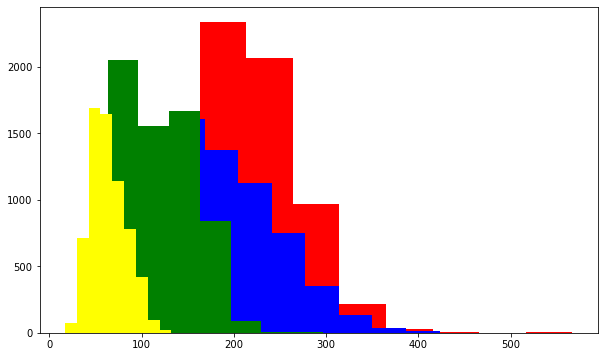

In [65]:
#데이터 시각화 > 
import matplotlib
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,6))
plt.hist(df.THEFT, color='red')
plt.hist(df.BATTERY, color='blue')
plt.hist(df.CRIMINAL_DAMAGE, color='green')
plt.hist(df.ASSAULT, color='yellow')
plt.show()

In [66]:
df.columns

Index(['temp', 'feelslike', 'humidity', 'precip', 'windspeed', 'cloudcover',
       'visibility', 'solarenergy', 'THEFT', 'BATTERY', 'CRIMINAL_DAMAGE',
       'ASSAULT', 'BURGLARY', 'NARCOTICS', 'ROBBERY', 'MOTOR_VEHICLE_THEFT',
       'CRIMINAL_TRESPASS', 'WEAPONS_VIOLATION', 'OFFENSE_INVOLVING_CHILDREN',
       'CRIM_SEXUAL_ASSAULT', 'INTERFERENCE_WITH_PUBLIC_OFFICER',
       'SEX_OFFENSE', 'PROSTITUTION', 'ARSON', 'LIQUOR_LAW_VIOLATION',
       'KIDNAPPING'],
      dtype='object')

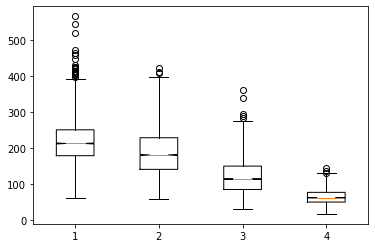

In [67]:
#이상값 시각화 >
plt.boxplot([df.THEFT, df.BATTERY, df.CRIMINAL_DAMAGE, df.ASSAULT], notch=True, whis=2.0)
plt.show()

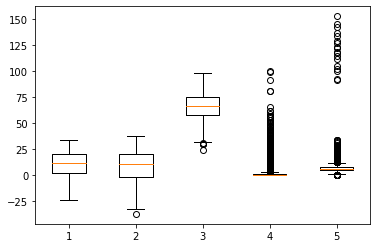

In [68]:
plt.boxplot([df.temp, df.feelslike, df.humidity, df.precip, df.OFFENSE_INVOLVING_CHILDREN])
plt.show()

In [69]:
import numpy as np

def get_outlier(df=None, column=None, weight=1.5):
  # target 값과 상관관계가 높은 열을 우선적으로 진행
    quantile_25 = np.percentile(df[column].values, 25)
    quantile_75 = np.percentile(df[column].values, 75)

    IQR = quantile_75 - quantile_25
    IQR_weight = IQR*weight
  
    lowest = quantile_25 - IQR_weight
    highest = quantile_75 + IQR_weight
  
    outlier_idx = df[column][ (df[column] < lowest) | (df[column] > highest) ].index
    return outlier_idx

# 함수 사용해서 이상치 값 삭제

col = [ 'THEFT', 'BATTERY', 'CRIMINAL_DAMAGE',
       'ASSAULT', 'BURGLARY', 'NARCOTICS', 'ROBBERY', 'MOTOR_VEHICLE_THEFT',
       'CRIMINAL_TRESPASS', 'WEAPONS_VIOLATION', 'OFFENSE_INVOLVING_CHILDREN',
       'CRIM_SEXUAL_ASSAULT', 'INTERFERENCE_WITH_PUBLIC_OFFICER',
       'SEX_OFFENSE', 'PROSTITUTION', 'ARSON',
       'LIQUOR_LAW_VIOLATION', 'KIDNAPPING', ]

for i in col :
    outlier_idx = get_outlier(df=df, column= i , weight=1.5)
    df.drop(outlier_idx, axis=0, inplace=True)

In [70]:
df

,temp,feelslike,humidity,precip,windspeed,cloudcover,visibility,solarenergy,THEFT,BATTERY,...,CRIMINAL_TRESPASS,WEAPONS_VIOLATION,OFFENSE_INVOLVING_CHILDREN,CRIM_SEXUAL_ASSAULT,INTERFERENCE_WITH_PUBLIC_OFFICER,SEX_OFFENSE,PROSTITUTION,ARSON,LIQUOR_LAW_VIOLATION,KIDNAPPING
datetime,,,,,,,,,,,,,,,,,,,,,
2001-01-02,-11.2,-17.6,81.3,0.000,21.5,2.2,15.0,0.0,221,143,...,35,9.0,4.0,2.0,1.0,4.0,11.0,0.0,2.0,1.0
2001-01-04,-3.3,-8.8,86.4,0.000,34.4,98.6,11.4,0.0,243,173,...,29,9.0,5.0,2.0,3.0,1.0,19.0,1.0,4.0,2.0
2001-01-08,-5.4,-11.2,71.8,0.000,21.5,54.4,16.0,0.0,244,192,...,36,5.0,9.0,3.0,1.0,6.0,12.0,3.0,5.0,1.0
2001-01-09,-7.4,-14.0,74.0,0.000,25.1,22.3,16.0,0.0,261,212,...,52,9.0,3.0,3.0,0.0,5.0,15.0,3.0,2.0,2.0
2001-01-11,-0.9,-4.2,75.0,0.000,14.3,68.3,14.2,0.0,257,222,...,37,14.0,4.0,4.0,2.0,5.0,25.0,2.0,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-21,1.1,-4.2,81.8,1.443,30.8,100.0,13.4,0.9,251,138,...,26,9.0,7.0,3.0,2.0,2.0,0.0,2.0,0.0,0.0
2018-12-23,1.2,-3.5,69.3,0.000,35.3,91.6,14.9,4.5,147,138,...,22,9.0,6.0,1.0,2.0,3.0,0.0,1.0,0.0,0.0
2018-12-24,-1.7,-5.4,61.5,0.000,24.0,54.8,16.0,6.4,162,107,...,11,7.0,8.0,3.0,2.0,5.0,0.0,3.0,0.0,0.0


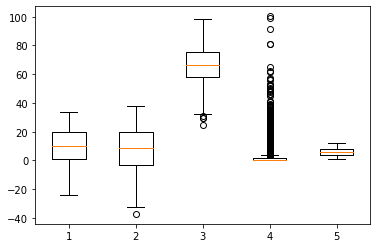

In [71]:
# 이상값 처리 후

plt.boxplot([df.temp, df.feelslike, df.humidity, df.precip, df.OFFENSE_INVOLVING_CHILDREN])
plt.show()

# Normalization

In [72]:
# MIN-MAX SCALING: 최솟값, 최대값을 이용해서 데이터의 크기를 0과 1 사이로 정규화
#변수의 크기가 상대적일 때, 해당 변수의 영향력이 제대로 표현되지 않을 수 있음

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df)
scaled_df = scaler.transform(df)

scaled_df = pd.DataFrame(scaled_df)

scaled_df.index = df.index
scaled_df.columns = df.columns

scaled_df

,temp,feelslike,humidity,precip,windspeed,cloudcover,visibility,solarenergy,THEFT,BATTERY,...,CRIMINAL_TRESPASS,WEAPONS_VIOLATION,OFFENSE_INVOLVING_CHILDREN,CRIM_SEXUAL_ASSAULT,INTERFERENCE_WITH_PUBLIC_OFFICER,SEX_OFFENSE,PROSTITUTION,ARSON,LIQUOR_LAW_VIOLATION,KIDNAPPING
datetime,,,,,,,,,,,,,,,,,,,,,
2001-01-02,0.219512,0.261682,0.771117,0.000000,0.192857,0.022,0.86250,0.000000,0.510638,0.280936,...,0.524590,0.421053,0.272727,0.222222,0.166667,0.444444,0.314286,0.000000,0.285714,0.5
2001-01-04,0.357143,0.379172,0.840599,0.000000,0.377143,0.986,0.63750,0.000000,0.588652,0.381271,...,0.426230,0.421053,0.363636,0.222222,0.500000,0.111111,0.542857,0.333333,0.571429,1.0
2001-01-08,0.320557,0.347130,0.641689,0.000000,0.192857,0.544,0.92500,0.000000,0.592199,0.444816,...,0.540984,0.210526,0.727273,0.333333,0.166667,0.666667,0.342857,1.000000,0.714286,0.5
2001-01-09,0.285714,0.309746,0.671662,0.000000,0.244286,0.223,0.92500,0.000000,0.652482,0.511706,...,0.803279,0.421053,0.181818,0.333333,0.000000,0.555556,0.428571,1.000000,0.285714,1.0
2001-01-11,0.398955,0.440587,0.685286,0.000000,0.090000,0.683,0.81250,0.000000,0.638298,0.545151,...,0.557377,0.684211,0.272727,0.444444,0.333333,0.555556,0.714286,0.666667,0.714286,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-21,0.433798,0.440587,0.777929,0.014385,0.325714,1.000,0.76250,0.027692,0.617021,0.264214,...,0.377049,0.421053,0.545455,0.333333,0.333333,0.222222,0.000000,0.666667,0.000000,0.0
2018-12-23,0.435540,0.449933,0.607629,0.000000,0.390000,0.916,0.85625,0.138462,0.248227,0.264214,...,0.311475,0.421053,0.454545,0.111111,0.333333,0.333333,0.000000,0.333333,0.000000,0.0
2018-12-24,0.385017,0.424566,0.501362,0.000000,0.228571,0.548,0.92500,0.196923,0.301418,0.160535,...,0.131148,0.315789,0.636364,0.333333,0.333333,0.555556,0.000000,1.000000,0.000000,0.0


In [73]:
crime.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location', 'Datetime', 'Weekday', 'Hour', 'Day', 'Week', 'Month',
       'weekday', 'month', 'day'],
      dtype='object')

# 연관분석

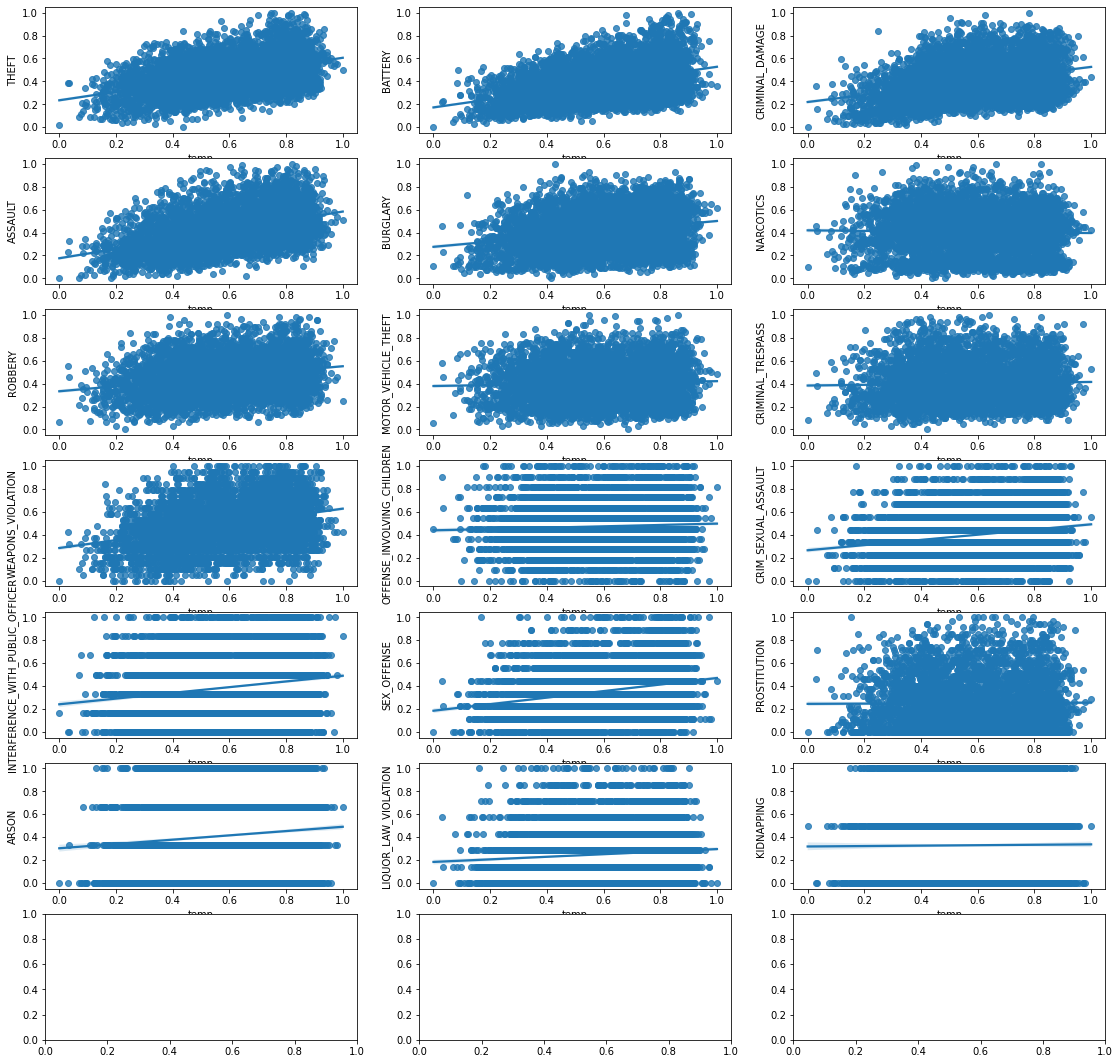

In [74]:
#회귀 분석 결과를 산점도 + 선형회귀 그래프로 시각화하기
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(figsize = (19,19), ncols = 3, nrows = 7)

y_features = ['THEFT', 'BATTERY', 'CRIMINAL_DAMAGE', 'ASSAULT', 'BURGLARY', 'NARCOTICS', 'ROBBERY', 'MOTOR_VEHICLE_THEFT', 
              'CRIMINAL_TRESPASS', 'WEAPONS_VIOLATION', 'OFFENSE_INVOLVING_CHILDREN', 'CRIM_SEXUAL_ASSAULT', 
              'INTERFERENCE_WITH_PUBLIC_OFFICER', 'SEX_OFFENSE', 'PROSTITUTION', 'ARSON', 'LIQUOR_LAW_VIOLATION', 'KIDNAPPING'
             ]

for i, feature in enumerate(y_features):
    row = int(i/3)
    col = i%3
    sns.regplot(x = 'temp', y = feature, data = scaled_df, ax = axs[row][col])

<AxesSubplot:>

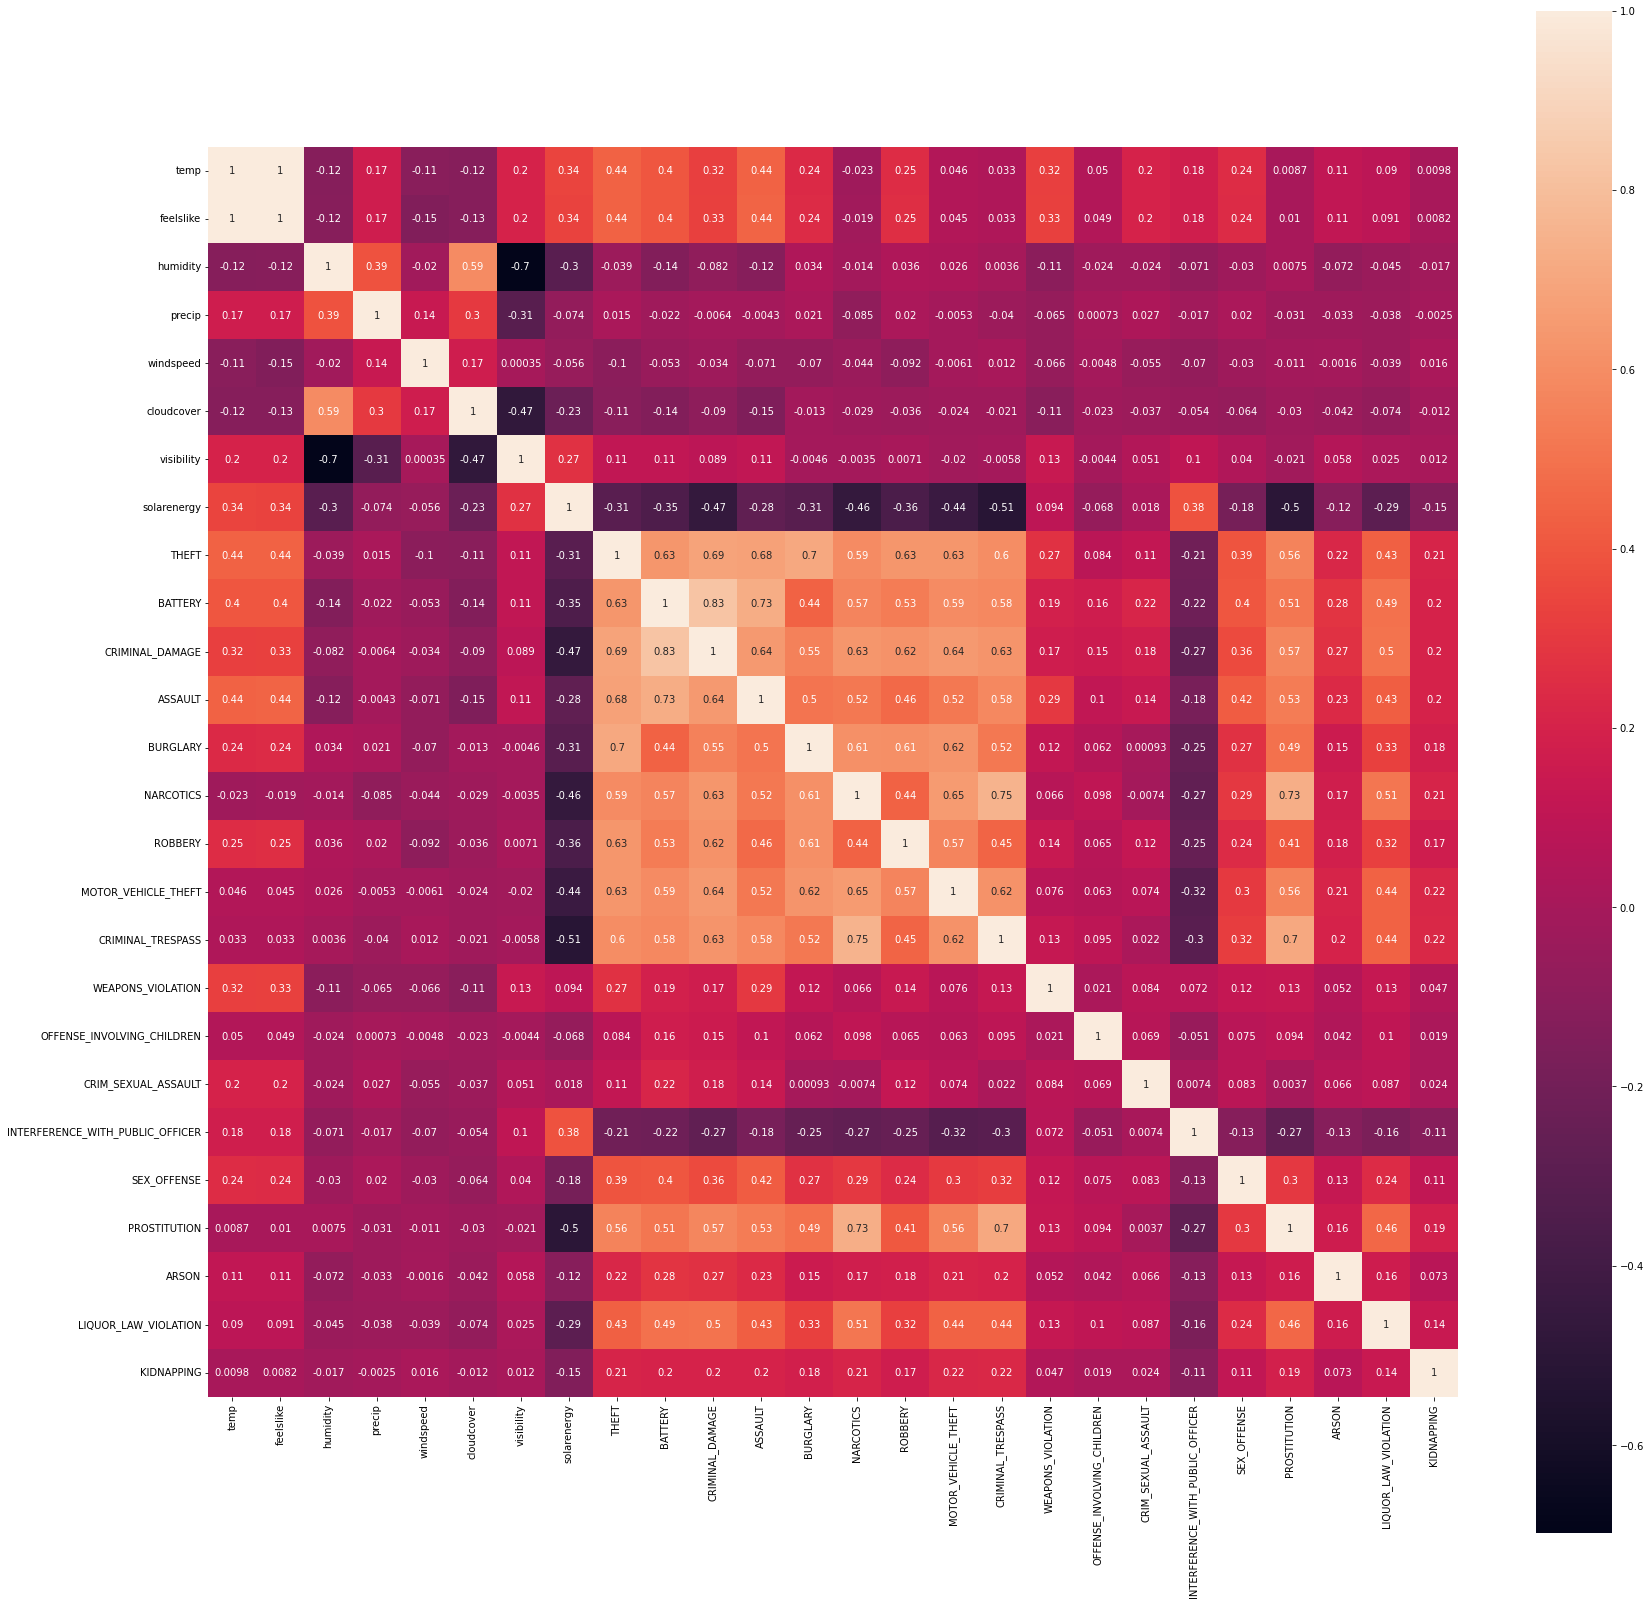

In [75]:
cor = scaled_df.corr()
plt.figure(figsize=(28,28))
sns.heatmap(cor, vmax=1,square=True,annot=True)

# delete some unusable columns
in heatmap, there are some columns that have lower correlation ( -0.3 ~ 0.3 ) drop them.

furthermore, 'INTERFERENCE_WITH_PUBLIC_OFFICER' column has high correlation with only 'solarenergy' column, because most of the working time is during the day. So, drop it.

also, 'feelslike' columns has very high correlation with temp. so drop it, too.

In [76]:
scaled_df.drop(['feelslike', 'INTERFERENCE_WITH_PUBLIC_OFFICER', 'BURGLARY', 'WEAPONS_VIOLATION', 'OFFENSE_INVOLVING_CHILDREN', 'CRIM_SEXUAL_ASSAULT' , 'SEX_OFFENSE', 
                'ARSON',  'LIQUOR_LAW_VIOLATION', 'KIDNAPPING'],axis=1, inplace=True)
df.drop(['feelslike', 'INTERFERENCE_WITH_PUBLIC_OFFICER', 'BURGLARY', 'WEAPONS_VIOLATION', 'OFFENSE_INVOLVING_CHILDREN', 'CRIM_SEXUAL_ASSAULT' , 'SEX_OFFENSE', 
                'ARSON',  'LIQUOR_LAW_VIOLATION', 'KIDNAPPING'],axis=1, inplace=True)

In [77]:
scaled_df.columns

Index(['temp', 'humidity', 'precip', 'windspeed', 'cloudcover', 'visibility',
       'solarenergy', 'THEFT', 'BATTERY', 'CRIMINAL_DAMAGE', 'ASSAULT',
       'NARCOTICS', 'ROBBERY', 'MOTOR_VEHICLE_THEFT', 'CRIMINAL_TRESPASS',
       'PROSTITUTION'],
      dtype='object')

<AxesSubplot:>

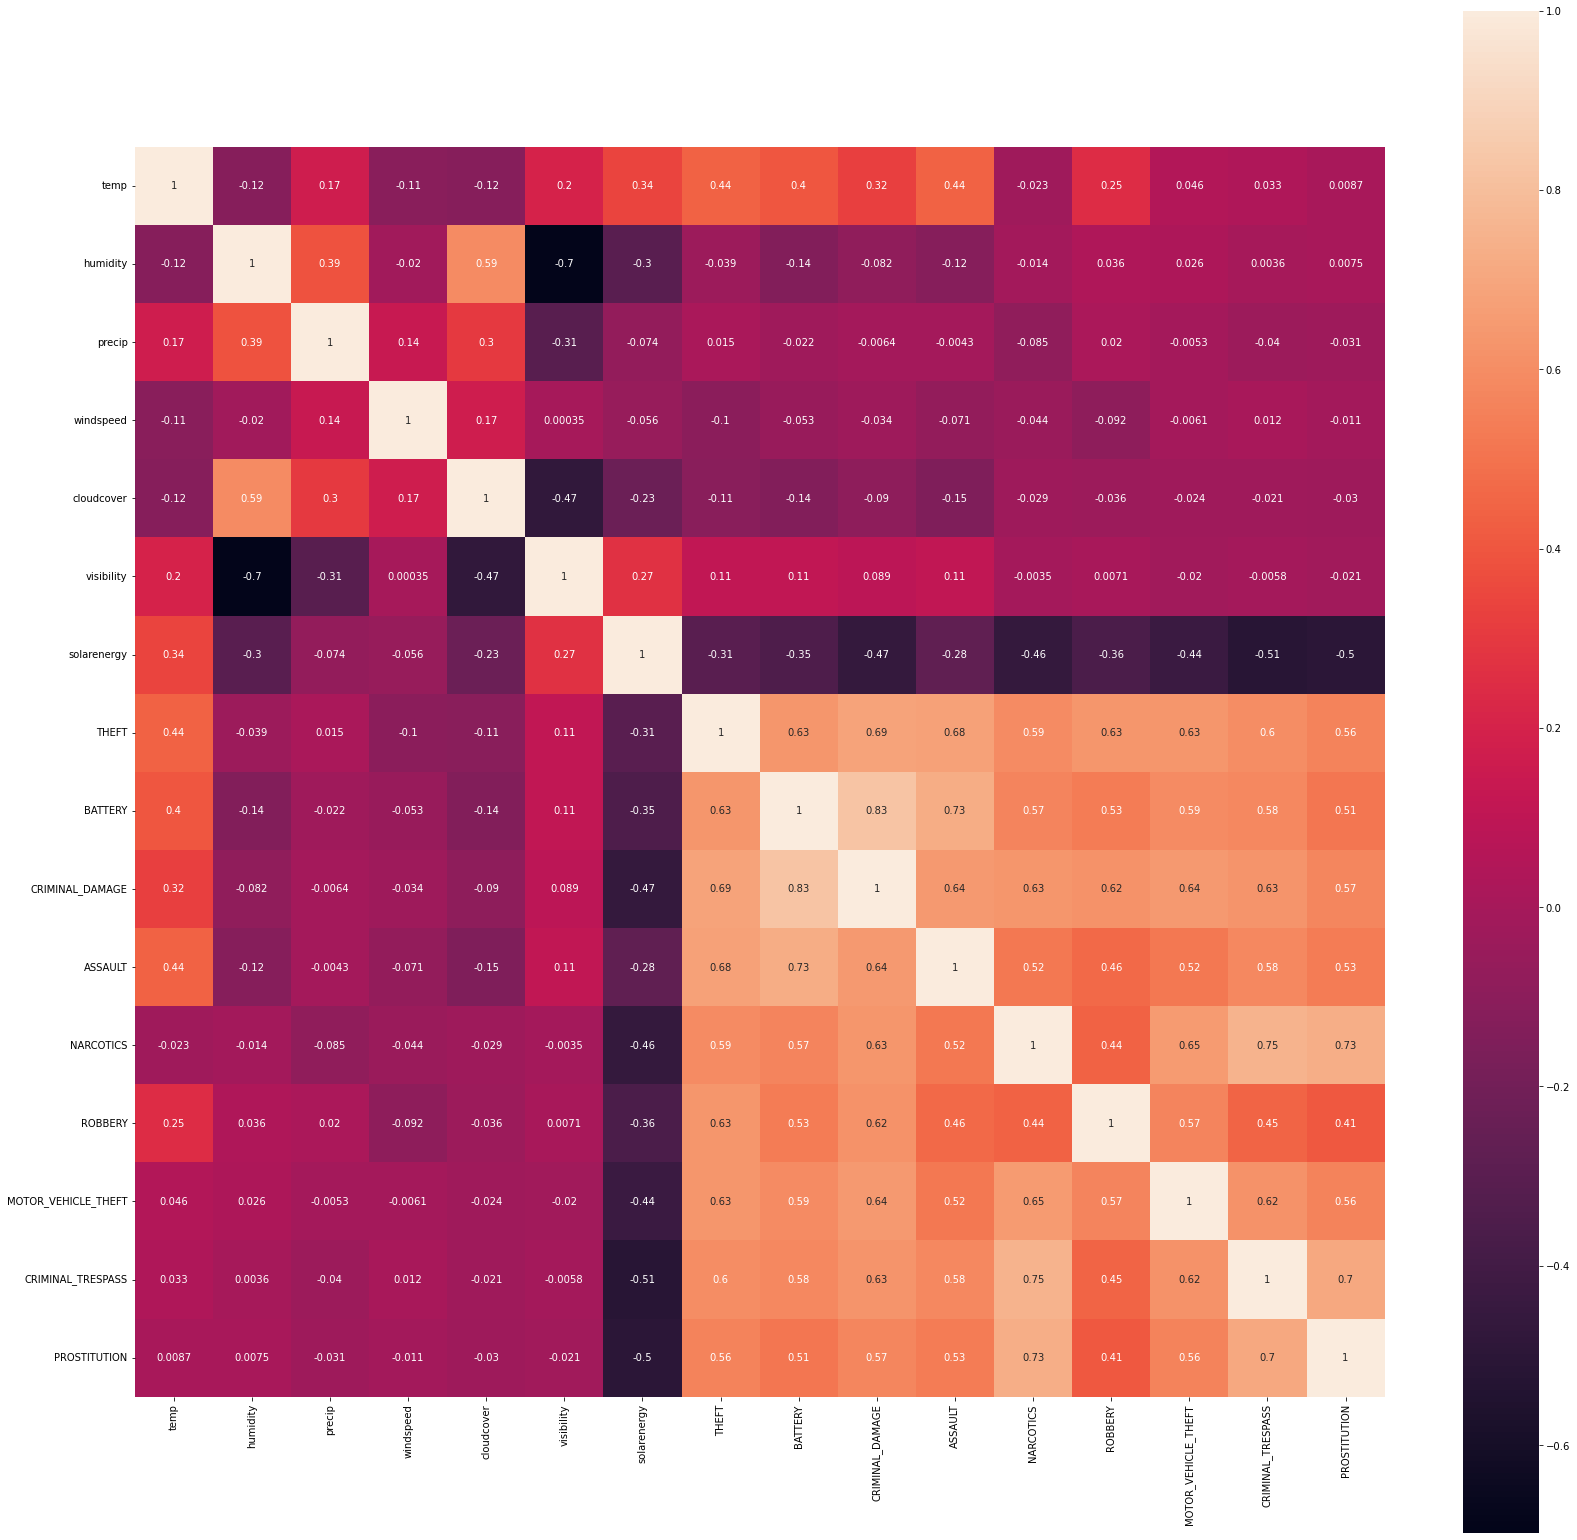

In [78]:
cor = scaled_df.corr()
plt.figure(figsize=(28,28))
sns.heatmap(cor, vmax=1,square=True,annot=True)

In [79]:
THEFT

Date
2001-01-01    412
2001-01-02    221
2001-01-03    226
2001-01-04    243
2001-01-05    265
             ... 
2022-11-10    154
2022-11-11    193
2022-11-12    143
2022-11-13    124
2022-11-14    119
Name: Primary Type, Length: 7988, dtype: int64

In [80]:
# 전체 범죄의 개수 시각화

plt.figure(figsize=(12,6))
dfr = pd.DataFrame({'THEFT':THEFT/float(THEFT.max()),
                    'BATTERY':BATTERY/float(BATTERY.max()),
                    'CRIMINAL_DAMAGE':CRIMINAL_DAMAGE/float(CRIMINAL_DAMAGE.max()),
                    'ASSAULT':ASSAULT/float(ASSAULT.max())
                    })

# max scaling을 해줘서 0-1 사이의 값으로 맞춰준 것 같음

#daily = dfr.resample('d')  #Datetime Index를 day 기준으로 나누어주는 메소드 - daily plot을 불러오는 데 시간이 너무 많이 소요되며, 과적합 발생
#daily.plot()

<Figure size 864x432 with 0 Axes>

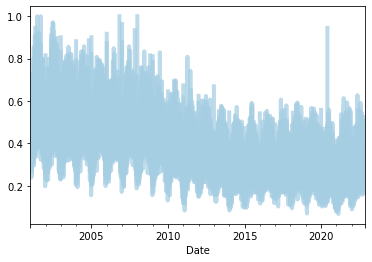

In [81]:
monthly = dfr.resample('M')  #Datetime Index를 month 기준으로 나누어주는 메소드 
ax = monthly.plot(lw=4,alpha=.75,colormap='Paired')

In [82]:
def autolabel(rects):
    # attach some text labels 각 막대 그래프 위에 텍스트 레이블 부착
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

In [83]:
df['Date'] = df.index
df

,temp,humidity,precip,windspeed,cloudcover,visibility,solarenergy,THEFT,BATTERY,CRIMINAL_DAMAGE,ASSAULT,NARCOTICS,ROBBERY,MOTOR_VEHICLE_THEFT,CRIMINAL_TRESPASS,PROSTITUTION,Date
datetime,,,,,,,,,,,,,,,,,
2001-01-02,-11.2,81.3,0.000,21.5,2.2,15.0,0.0,221,143,118,66,175,35,65,35,11.0,2001-01-02
2001-01-04,-3.3,86.4,0.000,34.4,98.6,11.4,0.0,243,173,133,57,142,55,87,29,19.0,2001-01-04
2001-01-08,-5.4,71.8,0.000,21.5,54.4,16.0,0.0,244,192,104,67,161,44,62,36,12.0,2001-01-08
2001-01-09,-7.4,74.0,0.000,25.1,22.3,16.0,0.0,261,212,120,63,115,38,65,52,15.0,2001-01-09
2001-01-11,-0.9,75.0,0.000,14.3,68.3,14.2,0.0,257,222,111,89,160,34,59,37,25.0,2001-01-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-21,1.1,81.8,1.443,30.8,100.0,13.4,0.9,251,138,64,51,30,32,26,26,0.0,2018-12-21
2018-12-23,1.2,69.3,0.000,35.3,91.6,14.9,4.5,147,138,87,46,25,29,27,22,0.0,2018-12-23
2018-12-24,-1.7,61.5,0.000,24.0,54.8,16.0,6.4,162,107,65,51,16,25,19,11,0.0,2018-12-24


In [84]:
#df['Time'] = range((max(df.index)-min(df.index)).days+1)

#df.reset_index(inplace=True)
df.set_index('Date',drop=False,inplace=True)
df['Weekday'] = df['Date'].apply(lambda x:x.weekday())
df['Hour'] = df['Date'].apply(lambda x:x.hour)
df['Week'] = df['Date'].apply(lambda x:x.week)
df['Month'] = df['Date'].apply(lambda x:x.month)
df['Year'] = df['Date'].apply(lambda x:x.year)
df['Weekend'] = df['Weekday'].isin([5,6]).astype(int)

df

,temp,humidity,precip,windspeed,cloudcover,visibility,solarenergy,THEFT,BATTERY,CRIMINAL_DAMAGE,...,MOTOR_VEHICLE_THEFT,CRIMINAL_TRESPASS,PROSTITUTION,Date,Weekday,Hour,Week,Month,Year,Weekend
Date,,,,,,,,,,,,,,,,,,,,,
2001-01-02,-11.2,81.3,0.000,21.5,2.2,15.0,0.0,221,143,118,...,65,35,11.0,2001-01-02,1,0,1,1,2001,0
2001-01-04,-3.3,86.4,0.000,34.4,98.6,11.4,0.0,243,173,133,...,87,29,19.0,2001-01-04,3,0,1,1,2001,0
2001-01-08,-5.4,71.8,0.000,21.5,54.4,16.0,0.0,244,192,104,...,62,36,12.0,2001-01-08,0,0,2,1,2001,0
2001-01-09,-7.4,74.0,0.000,25.1,22.3,16.0,0.0,261,212,120,...,65,52,15.0,2001-01-09,1,0,2,1,2001,0
2001-01-11,-0.9,75.0,0.000,14.3,68.3,14.2,0.0,257,222,111,...,59,37,25.0,2001-01-11,3,0,2,1,2001,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-21,1.1,81.8,1.443,30.8,100.0,13.4,0.9,251,138,64,...,26,26,0.0,2018-12-21,4,0,51,12,2018,0
2018-12-23,1.2,69.3,0.000,35.3,91.6,14.9,4.5,147,138,87,...,27,22,0.0,2018-12-23,6,0,51,12,2018,1
2018-12-24,-1.7,61.5,0.000,24.0,54.8,16.0,6.4,162,107,65,...,19,11,0.0,2018-12-24,0,0,52,12,2018,0


# 7. 회귀분석

## 날씨 변수로 각 범죄의 발생횟수를 회귀 모델로 예측
## 독립변수 간의 강한 상관관계가 존재(0.9이상)하면 다중 회귀분석의 독립변수의 적합도가 떨어짐

> 머신러닝의 프로세스 1->2->3

1. Train 함수로 - 회귀분석 모델을 만들고

2. Predict 함수로 - 그 모델을 가지고 예측해봄

3. Evaluate 함수로 - 그리고 그 예측 결과의 정확도를 계산함


In [91]:
from sklearn.model_selection import train_test_split
#학습에 사용할 feature 선정 후 train/test분리(default 75:25)

In [93]:
X=scaled_df[['temp','windspeed','visibility']] #temp, humidity, precip, windspeed, cloudcover, visibility, solarenergy
y=scaled_df[['THEFT']]
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [94]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model as lm
import xgboost as xgb
from scipy.stats import uniform, randint

models = [
    ('lr', lm.LinearRegression(n_jobs=-1)),
    ('ridge', lm.Ridge()),
    ('lasso', lm.Lasso()),
    ('elastic', lm.ElasticNet()),
    ('LassoLars', lm.LassoLars()),
    #('LogisticRegression', lm.LogisticRegression(C=1, penalty='l1', solver='liblinear')),
    ('SGDRegressor', lm.SGDRegressor()),
    #('Perceptron', lm.Perceptron(n_jobs=-1)),
    ('xgboost', xgb.XGBRegressor())
]
n = 3
params = {
    'lr' : {
        'fit_intercept': [True, False],
        'normalize': [True, False],
    },
    'ridge': {
        'alpha': [0.01, 0.1, 1.0, 10, 100],
        'fit_intercept': [True, False],
        'normalize': [True, False],
    },
    'lasso': {
        'alpha': [0.1, 1.0, 10],
        'fit_intercept': [True, False],
        'normalize': [True, False],
    },
    'elastic': {
        'alpha': [0.1, 1.0, 10],
        'normalize': [True, False],
        'fit_intercept': [True, False],
    },
    'LassoLars': {
        'alpha': [0.1, 1.0, 10],
        'normalize': [True, False],
        'fit_intercept': [True, False],
    },
    'SGDRegressor': {
        'penalty': ['l1', 'l2'],
        'alpha': [0.001, 0.01, 0.1, 1.0, 10, 100],
        'fit_intercept': [True, False],
    },
    'xgboost': {
        "gamma": uniform(0, 0.5).rvs(n),
        "max_depth": range(2, 7), # default 3
        "n_estimators": randint(100, 150).rvs(n), # default 100
    }
}

best_model, best_mae = None, float('inf')
for model_name, model in models:
    param_grid = params[model_name]
    grid = GridSearchCV(model, cv=5, n_jobs=-1, param_grid=param_grid)
    grid = grid.fit(X_train, y_train)

    model = grid.best_estimator_
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)

    print(model_name, mae)

    if mae < best_mae:
        best_model = model

C:\Users\0308s\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


lr 0.11996182738979291


C:\Users\0308s\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


ridge 0.1199562641032675


C:\Users\0308s\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


lasso 0.132729291370875


C:\Users\0308s\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  warnings.warn(


elastic 0.132729291370875
LassoLars 0.132729291370875


C:\Users\0308s\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor 0.12168800665153748
xgboost 0.119670249178073


In [ ]:
#라쏘가 가장 성능 좋음

In [95]:
#LinearRegression 진행
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)
y_pred = lr.predict(X_test)


In [96]:
from sklearn.metrics import r2_score
# r-square 함수사용
r2_score(y_test, y_pred)

0.1920618968418859

In [100]:
import statsmodels.api as sm
X_data = sm.add_constant(X, has_constant='add')
lr_check = sm.OLS(y,X_data)
result = lr_check.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  THEFT   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     356.1
Date:                Tue, 29 Nov 2022   Prob (F-statistic):          6.08e-207
Time:                        00:39:53   Log-Likelihood:                 2195.0
No. Observations:                4384   AIC:                            -4382.
Df Residuals:                    4380   BIC:                            -4356.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2404      0.014     17.470      0.000       0.213       0.267
temp           0.3623      0.012     30.745      0.000       0.339       0.385
windspeed     -0.0802      0.020     -3.948      0.000      -0.120      -0.040
visibility     0.0236      0.014      1.639      0.101      -0.005       0.052
==============================================================================
Omnibus:                      102.333   Durbin-Watson:                   0.573
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              102.546
Skew:                           0.349   Prob(JB):                     5.40e-23
Kurtosis:                       2.726   Cond. No.                         14.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [103]:
#범죄들 간의 회귀분석
X=scaled_df[['BATTERY','CRIMINAL_DAMAGE','ASSAULT','NARCOTICS','ROBBERY','MOTOR_VEHICLE_THEFT','CRIMINAL_TRESPASS','PROSTITUTION']]
y=scaled_df[['THEFT']]
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [104]:
#LinearRegression 진행
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [105]:
from sklearn.metrics import r2_score
# r-square 함수사용
r2_score(y_test, y_pred)

0.6453649371174657

In [108]:
import statsmodels.api as sm
X_data = sm.add_constant(X, has_constant="add")
lr_check = sm.OLS(y,X_data)
result = lr_check.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  THEFT   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     1021.
Date:                Tue, 29 Nov 2022   Prob (F-statistic):               0.00
Time:                        00:52:21   Log-Likelihood:                 4024.8
No. Observations:                4384   AIC:                            -8032.
Df Residuals:                    4375   BIC:                            -7974.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0749      0.005     14.876      0.000       0.065       0.085
BATTERY                -0.0741      0.017     -4.389      0.000      -0.107      -0.041
CRIMINAL_DAMAGE         0.1651      0.016     10.221      0.000       0.133       0.197
ASSAULT                 0.3140      0.013     24.936      0.000       0.289       0.339
NARCOTICS               0.0690      0.013      5.251      0.000       0.043       0.095
ROBBERY                 0.2378      0.011     20.904      0.000       0.216       0.260
MOTOR_VEHICLE_THEFT     0.1212      0.012      9.841      0.000       0.097       0.145
CRIMINAL_TRESPASS       0.0383      0.014      2.825      0.005       0.012       0.065
PROSTITUTION            0.0305      0.010      2.987      0.003       0.010       0.051
==============================================================================
Omnibus:                       85.273   Durbin-Watson:                   1.261
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              108.707
Skew:                           0.259   Prob(JB):                     2.48e-24
Kurtosis:                       3.572   Cond. No.                         22.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
arson_gb = allcrime_df[allcrime_df['Primary Type'] == 'ARSON'].groupby('Date')['ID'].agg(len)
assault_gb = allcrime_df[allcrime_df['Primary Type'] == 'ASSAULT'].groupby('Date')['ID'].agg(len)
battery_gb = allcrime_df[allcrime_df['Primary Type'] == 'BATTERY'].groupby('Date')['ID'].agg(len)
burglary_gb = allcrime_df[allcrime_df['Primary Type'] == 'BURGLARY'].groupby('Date')['ID'].agg(len)
homicide_gb = allcrime_df[allcrime_df['Primary Type'] == 'HOMICIDE'].groupby('Date')['ID'].agg(len)
sexual_assault_gb = allcrime_df[allcrime_df['Primary Type'] == 'CRIM SEXUAL ASSAULT'].groupby('Date')['ID'].agg(len)
robbery_gb = allcrime_df[allcrime_df['Primary Type'] == 'ROBBERY'].groupby('Date')['ID'].agg(len)
theft_gb = allcrime_df[allcrime_df['Primary Type'] == 'THEFT'].groupby('Date')['ID'].agg(len)
vehicle_theft_gb = allcrime_df[allcrime_df['Primary Type'] == 'MOTOR VEHICLE THEFT'].groupby('Date')['ID'].agg(len)
personal_gb = allcrime_df[allcrime_df['Primary Type'].isin(personal_crimes)].groupby('Date')['ID'].agg(len)
property_gb = allcrime_df[allcrime_df['Primary Type'].isin(property_crimes)].groupby('Date')['ID'].agg(len)

arson_gb.index = pd.to_datetime(arson_gb.index)
assault_gb.index = pd.to_datetime(assault_gb.index)
battery_gb.index = pd.to_datetime(battery_gb.index)
burglary_gb.index = pd.to_datetime(burglary_gb.index)
homicide_gb.index = pd.to_datetime(homicide_gb.index)
sexual_assault_gb.index = pd.to_datetime(sexual_assault_gb.index)
robbery_gb.index = pd.to_datetime(robbery_gb.index)
theft_gb.index = pd.to_datetime(theft_gb.index)
vehicle_theft_gb.index = pd.to_datetime(vehicle_theft_gb.index)
personal_gb.index = pd.to_datetime(personal_gb.index)
property_gb.index = pd.to_datetime(property_gb.index)


ts = pd.DataFrame({'Arson':arson_gb.loc[:'2018-3-31'],
                   'Assault':assault_gb.loc[:'2018-3-31'],
                   'Battery':battery_gb.loc[:'2018-3-31'],
                   'Burglary':burglary_gb.loc[:'2018-3-31'],
                   'Homicide':homicide_gb.loc[:'2018-3-31'],
                   'Sexual_assault':sexual_assault_gb.loc[:'2018-3-31'],
                   'Robbery':robbery_gb.loc[:'2018-3-31'],
                   'Vehicle_theft':vehicle_theft_gb.loc[:'2018-3-31'],
                   'Theft':theft_gb.loc[:'2018-3-31'],
                   'Personal':personal_gb.loc[:'2018-3-31'],
                   'Property':property_gb.loc[:'2018-3-31'],
                   'Temperature':weather_df['temp'].loc[:'2018-3-31'],
                   'Binned temperature':weather_df['temp'].loc[:'2018-3-31']//10.*10,
                   'Humidity':weather_df['humidity'].loc[:'2018-3-31'],
                   'Precipitation':weather_df['precip'].loc[:'2018-3-31']
                   })
ts

In [ ]:
ts['Date'] = ts.index
ts

In [ ]:
ts['Time'] = range((max(ts.index)-min(ts.index)).days+1)

#ts.reset_index(inplace=True)
ts.set_index('Date',drop=False,inplace=True)
ts['Weekday'] = ts['Date'].apply(lambda x:x.weekday())
ts['Hour'] = ts['Date'].apply(lambda x:x.hour)
ts['Week'] = ts['Date'].apply(lambda x:x.week)
ts['Month'] = ts['Date'].apply(lambda x:x.month)
ts['Year'] = ts['Date'].apply(lambda x:x.year)
ts['Weekend'] = ts['Weekday'].isin([5,6]).astype(int)

ts

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
#ts.corr().columns
a = np.array(ts[['Arson','Burglary','Robbery','Theft','Assault','Battery','Homicide','Sexual_assault','Temperature','Humidity','Precipitation']].resample('M').sum().corr())
np.fill_diagonal(a,0)
plt.pcolor(a,cmap='YlOrBr',edgecolors='k')

plt.xlim((0,11))
plt.ylim((0,11))

plt.xticks(np.arange(.5,11.5),['Arson','Burglary','Robbery','Theft','Assault','Battery','Homicide','Sexual assault','Temperature','Humidity','Precipitation'],rotation=90,fontsize=15)
plt.yticks(np.arange(.5,11.5),['Arson','Burglary','Robbery','Theft','Assault','Battery','Homicide','Sexual assault','Temperature','Humidity','Precipitation'],fontsize=15)

plt.title('Correlation between crime occurences',fontsize=20)
plt.colorbar()
plt.grid(b=True,which='major',alpha=.5)

In [ ]:
plt.figure(figsize=(12,6))

ts3 = pd.DataFrame({'Personal':personal_gb/float(personal_gb.max()),
                    'Property':property_gb/float(property_gb.max())
                    })
monthly = ts3.resample('M')
#ax = monthly.plot(lw=4,alpha=.75,color = {'Personal':'#BB0000', 'Property':'#0000BB'})
ax = monthly.plot(lw=4,alpha=.75,colormap='Paired')
plt.xlabel('Time',fontsize=18)
plt.ylabel('Incidents (normalized)',fontsize=18)
plt.ylim((0,1))
plt.grid(False,which='minor')
plt.legend(["Personal", "Property"], loc='upper right', fontsize=18);
#ax.legend(loc='upper center',ncol=4,fontsize=18)


In [ ]:
plt.figure(figsize=(8,6))
#온도를 구간으로 나눠서(0에서 10 사이의 온도는 10으로) 범죄와의 boxplot확인
ax = ts.boxplot(['Personal','Property'],by='Binned temperature', figsize=(10,8))
ax[0].set_ylabel('Number of crimes',fontsize=18)
ax[0].set_xlabel('Temperature (F)',fontsize=18)
ax[0].set_title('Personal crimes',fontsize=15)

ax[1].set_xlabel('Temperature (F)',fontsize=18)
ax[1].set_title('Property crimes',fontsize=15)

plt.suptitle('Crime vs Temperature',fontsize=20)
#사물과 사람 두 가지 유형의 범죄 모두 온도가 증가하면 같이 증가하는 추세를 보임

In [ ]:
crime_df_gb_personal = allcrime_df[allcrime_df['Primary Type'].isin(personal_crimes)]
crime_df_gb_property = allcrime_df[allcrime_df['Primary Type'].isin(property_crimes)]

In [ ]:
def autolabel(rects):
    # attach some text labels 각 막대 그래프 위에 텍스트 레이블 부착
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

In [ ]:
bar_df = pd.DataFrame()
#x축은 달별로 자름 12달(groupby)
bar_df['Personal'] = crime_df_gb_personal.groupby('Month')['ID'].agg(len)/len(crime_df_gb_personal)*100
bar_df['Property'] = crime_df_gb_property.groupby('Month')['ID'].agg(len)/len(crime_df_gb_property)*100
ax = bar_df.plot(kind='bar',align='center', width=0.8, figsize=(10,8))
plt.title('Crimes peak in Summer',fontsize=20)
plt.xlabel('Month of Year', fontsize=18)
plt.xticks(plt.xticks()[0],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],fontsize=10,rotation=0)
plt.ylabel('% of crimes', fontsize=18)
plt.yticks(fontsize=15)
plt.ylim((0,14))
plt.legend(fontsize=12,ncol=2,loc='upper center')
autolabel(ax.patches)
#평균적으로 여름에 가장 범죄율이 높다. 

In [ ]:
bar_df = pd.DataFrame()
#x축은 시간별로 자름 24시간(groupby)
bar_df['Personal'] = crime_df_gb_personal.groupby('Hour')['ID'].agg(len)/len(crime_df_gb_personal)*100
bar_df['Property'] = crime_df_gb_property.groupby('Hour')['ID'].agg(len)/len(crime_df_gb_property)*100
ax = bar_df.plot(kind='bar',align='center', width=0.8, figsize=(10,6))
plt.title('Crimes peak in Aternoon',fontsize=20)
plt.xlabel('Hour of Day', fontsize=18)
plt.xticks(fontsize=10,rotation=0)
plt.ylabel('% of crimes', fontsize=18)
plt.yticks(fontsize=10)
plt.ylim((0,8))
plt.legend(fontsize=12,ncol=2,loc='upper center')
autolabel(ax.patches)
#결과를 보면 범죄는 새벽에 가장 낮은 빈도를, 오후에 가장 높은 빈도를 
#보인다. 물건에 관한 범죄는 밤이 되면 낮아지지만, 사람에 대한 범죄는
#비슷한 경향을 유지하고 있다.